In [8]:
import logging
import pandas as pd
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [ ]:
from pathlib import Path

DATA_DIR = Path("open_problems_multimodal")
FP_CELL_METADATA = DATA_DIR / "metadata.csv"

FP_CITE_TRAIN_INPUTS = DATA_DIR / "train_cite_inputs.h5"
FP_CITE_TRAIN_TARGETS = DATA_DIR / "train_cite_targets.h5"
FP_CITE_TEST_INPUTS = DATA_DIR / "test_cite_inputs.h5"

FP_MULTIOME_TRAIN_INPUTS = DATA_DIR / "train_multi_inputs.h5"
FP_MULTIOME_TRAIN_TARGETS = DATA_DIR / "train_multi_targets.h5"
FP_MULTIOME_TEST_INPUTS = DATA_DIR / "test_multi_inputs.h5"

FP_SUBMISSION = DATA_DIR / "sample_submission.csv"
FP_EVALUATION_IDS = DATA_DIR / "evaluation_ids.csv"

In [10]:
metadata_df = pd.read_csv(FP_CELL_METADATA)
metadata_df.head()

,cell_id,day,donor,cell_type,technology
0,c2150f55becb,2,27678,HSC,citeseq
1,65b7edf8a4da,2,27678,HSC,citeseq
2,c1b26cb1057b,2,27678,EryP,citeseq
3,917168fa6f83,2,27678,NeuP,citeseq
4,2b29feeca86d,2,27678,EryP,citeseq


In [11]:
len(metadata_df)

281528

In [12]:
len(metadata_df["cell_id"].unique())

281528

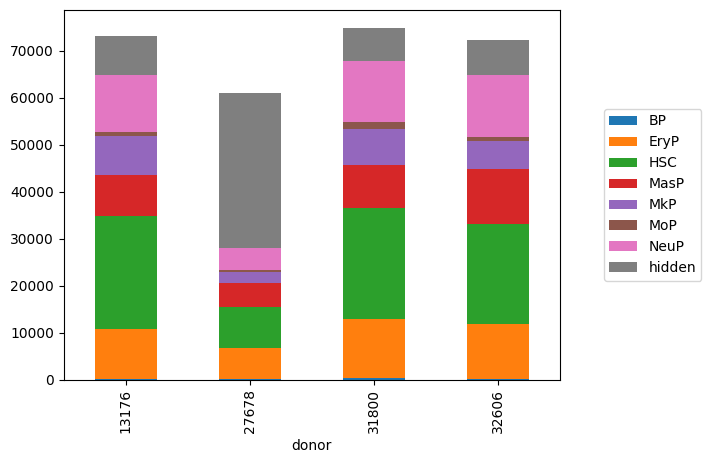

In [13]:
hist = metadata_df.groupby(["donor", "cell_type"])["cell_type"].count().unstack("cell_type").fillna(0)
hist.plot(kind="bar", stacked=True)
plt.legend(loc="center right", bbox_to_anchor=(1.3, 0.5))

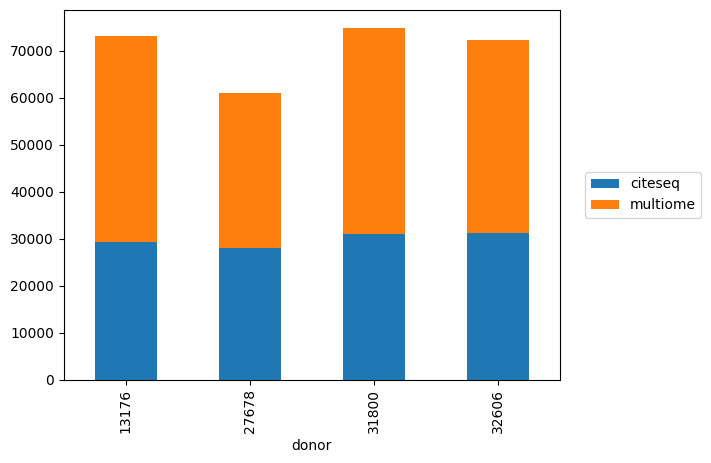

In [14]:
hist_tech = metadata_df.groupby(["donor", "technology"])["technology"].count().unstack("technology").fillna(0)
hist_tech.plot(kind="bar", stacked=True)
plt.legend(loc="center right", bbox_to_anchor=(1.3, 0.5))


In [15]:
X = pd.read_hdf(FP_CITE_TRAIN_INPUTS)
y = pd.read_hdf(FP_CITE_TRAIN_TARGETS)

X.head()

gene_id,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,4.090185,0.0
d02759a80ba2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,4.039545,0.0,0.0,0.00000,0.000000,0.000000,0.0
c016c6b0efa5,0.0,0.0,0.0,0.0,0.0,3.847321,0.000000,3.847321,3.847321,0.0,...,0.000000,0.000000,3.847321,4.529743,0.0,0.0,0.00000,3.847321,3.847321,0.0
ba7f733a4f75,0.0,0.0,0.0,0.0,0.0,0.000000,3.436846,3.436846,0.000000,0.0,...,3.436846,0.000000,4.113780,5.020215,0.0,0.0,0.00000,3.436846,4.113780,0.0
fbcf2443ffb2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.196826,0.000000,0.0,...,0.000000,4.196826,4.196826,4.196826,0.0,0.0,3.51861,4.196826,3.518610,0.0


In [16]:
X.columns

Index(['ENSG00000121410_A1BG', 'ENSG00000268895_A1BG-AS1',
       'ENSG00000175899_A2M', 'ENSG00000245105_A2M-AS1',
       'ENSG00000166535_A2ML1', 'ENSG00000128274_A4GALT',
       'ENSG00000094914_AAAS', 'ENSG00000081760_AACS', 'ENSG00000109576_AADAT',
       'ENSG00000103591_AAGAB',
       ...
       'ENSG00000153975_ZUP1', 'ENSG00000086827_ZW10',
       'ENSG00000174442_ZWILCH', 'ENSG00000122952_ZWINT',
       'ENSG00000198205_ZXDA', 'ENSG00000198455_ZXDB', 'ENSG00000070476_ZXDC',
       'ENSG00000162378_ZYG11B', 'ENSG00000159840_ZYX',
       'ENSG00000074755_ZZEF1'],
      dtype='object', name='gene_id', length=22050)

In [17]:
y.head()

gene_id,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,...,CD94,CD162,CD85j,CD23,CD328,HLA-E,CD82,CD101,CD88,CD224
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,1.167804,0.622530,0.106959,0.324989,3.331674,6.426002,1.480766,-0.728392,-0.468851,-0.073285,...,-0.448390,3.220174,-0.533004,0.674956,-0.006187,0.682148,1.398105,0.414292,1.780314,0.548070
d02759a80ba2,0.818970,0.506009,1.078682,6.848758,3.524885,5.279456,4.930438,2.069372,0.333652,-0.468088,...,0.323613,8.407108,0.131301,0.047607,-0.243628,0.547864,1.832587,0.982308,2.736507,2.184063
c016c6b0efa5,-0.356703,-0.422261,-0.824493,1.137495,0.518924,7.221962,-0.375034,1.738071,0.142919,-0.971460,...,1.348692,4.888579,-0.279483,-0.131097,-0.177604,-0.689188,9.013709,-1.182975,3.958148,2.868600
ba7f733a4f75,-1.201507,0.149115,2.022468,6.021595,7.258670,2.792436,21.708519,-0.137913,1.649969,-0.754680,...,1.504426,12.391979,0.511394,0.587863,-0.752638,1.714851,3.893782,1.799661,1.537249,4.407671
fbcf2443ffb2,-0.100404,0.697461,0.625836,-0.298404,1.369898,3.254521,-1.659380,0.643531,0.902710,1.291877,...,0.777023,6.496499,0.279898,-0.841950,-0.869419,0.675092,5.259685,-0.835379,9.631781,1.765445


In [18]:
y.columns

Index(['CD86', 'CD274', 'CD270', 'CD155', 'CD112', 'CD47', 'CD48', 'CD40',
       'CD154', 'CD52',
       ...
       'CD94', 'CD162', 'CD85j', 'CD23', 'CD328', 'HLA-E', 'CD82', 'CD101',
       'CD88', 'CD224'],
      dtype='object', name='gene_id', length=140)

In [19]:
summary = X.describe()
summary

gene_id,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
count,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,...,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000
mean,0.086048,0.199110,0.017556,0.167338,0.001346,0.096629,1.732955,1.640168,0.286222,1.276829,...,0.993167,1.458712,1.712961,3.404964,0.059131,0.200200,0.895061,1.203073,2.797493,0.894240
std,0.564659,0.843376,0.263296,0.783140,0.071854,0.596086,1.977421,1.982317,1.003846,1.829827,...,1.685713,1.900358,1.978515,2.073926,0.467184,0.842347,1.623040,1.811158,2.093627,1.622668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.307628,0.000000,0.000000,0.000000,0.000000,3.810219,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.816849,3.788277,0.000000,3.530414,...,3.191627,3.652694,3.800253,4.885360,0.000000,0.000000,0.000000,3.476293,4.455836,0.000000
max,5.402543,5.697094,6.385898,5.565943,4.376676,5.574059,5.898176,6.218979,5.365835,5.748921,...,5.727450,5.811031,5.905997,6.550168,5.219127,5.033606,5.891314,5.955992,6.977315,6.035307


In [20]:
summary


gene_id,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
count,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,...,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000
mean,0.086048,0.199110,0.017556,0.167338,0.001346,0.096629,1.732955,1.640168,0.286222,1.276829,...,0.993167,1.458712,1.712961,3.404964,0.059131,0.200200,0.895061,1.203073,2.797493,0.894240
std,0.564659,0.843376,0.263296,0.783140,0.071854,0.596086,1.977421,1.982317,1.003846,1.829827,...,1.685713,1.900358,1.978515,2.073926,0.467184,0.842347,1.623040,1.811158,2.093627,1.622668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.307628,0.000000,0.000000,0.000000,0.000000,3.810219,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.816849,3.788277,0.000000,3.530414,...,3.191627,3.652694,3.800253,4.885360,0.000000,0.000000,0.000000,3.476293,4.455836,0.000000
max,5.402543,5.697094,6.385898,5.565943,4.376676,5.574059,5.898176,6.218979,5.365835,5.748921,...,5.727450,5.811031,5.905997,6.550168,5.219127,5.033606,5.891314,5.955992,6.977315,6.035307


In [21]:
std = summary.iloc[summary.index == "std"]
constant_columns = (std.values == 0).sum()
logger.info(f"Number of constant columns: {constant_columns}")


INFO:__main__:Number of constant columns: 449


<AxesSubplot:ylabel='Frequency'>

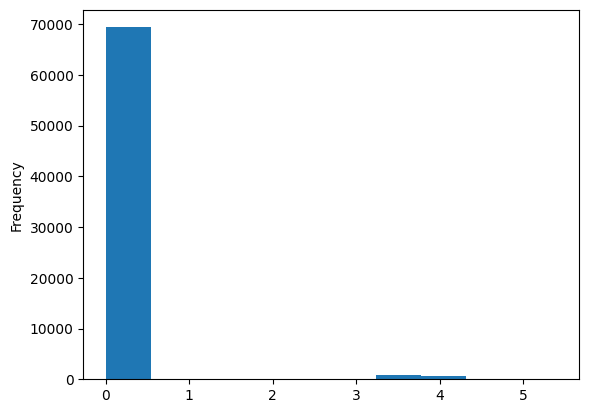

In [22]:
X["ENSG00000121410_A1BG"].plot(kind="hist")

In [23]:
logger.info(X.values.max())
logger.info(X.values.min())

INFO:__main__:11.579091
INFO:__main__:0.0


In [24]:
X.columns

Index(['ENSG00000121410_A1BG', 'ENSG00000268895_A1BG-AS1',
       'ENSG00000175899_A2M', 'ENSG00000245105_A2M-AS1',
       'ENSG00000166535_A2ML1', 'ENSG00000128274_A4GALT',
       'ENSG00000094914_AAAS', 'ENSG00000081760_AACS', 'ENSG00000109576_AADAT',
       'ENSG00000103591_AAGAB',
       ...
       'ENSG00000153975_ZUP1', 'ENSG00000086827_ZW10',
       'ENSG00000174442_ZWILCH', 'ENSG00000122952_ZWINT',
       'ENSG00000198205_ZXDA', 'ENSG00000198455_ZXDB', 'ENSG00000070476_ZXDC',
       'ENSG00000162378_ZYG11B', 'ENSG00000159840_ZYX',
       'ENSG00000074755_ZZEF1'],
      dtype='object', name='gene_id', length=22050)

In [25]:
metadata_df.describe()

,day,donor
count,281528.000000,281528.000000
mean,4.606348,26270.952445
std,2.570123,7967.233157
min,2.000000,13176.000000
25%,3.000000,13176.000000
50%,4.000000,31800.000000
75%,7.000000,32606.000000
max,10.000000,32606.000000


In [26]:
display(metadata_df.isna().sum())

if not metadata_df.index.duplicated().any():
    logger.info("All cells are unique")
if not metadata_df.isna().any().any():
    logger.info("No missing values")

cell_id       0
day           0
donor         0
cell_type     0
technology    0
dtype: int64

INFO:__main__:All cells are unique
INFO:__main__:No missing values


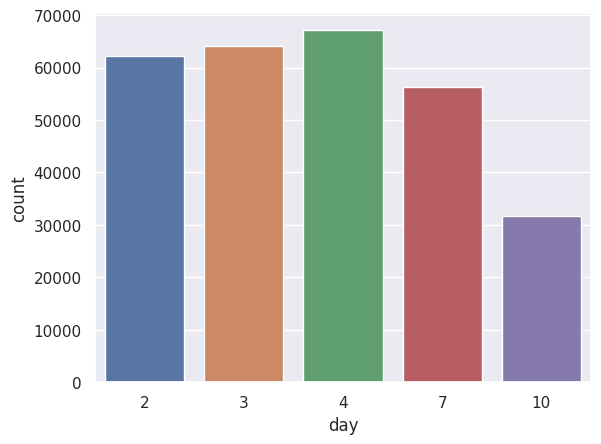

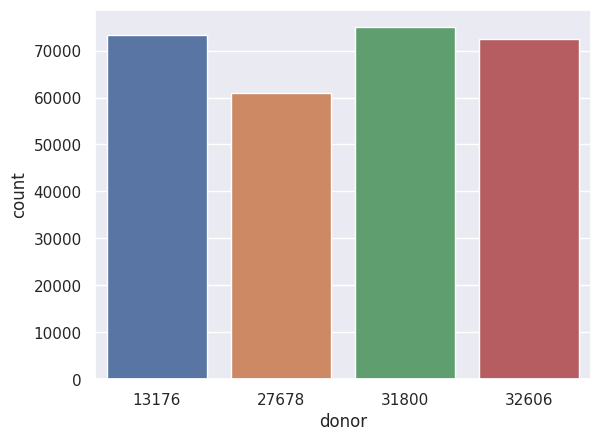

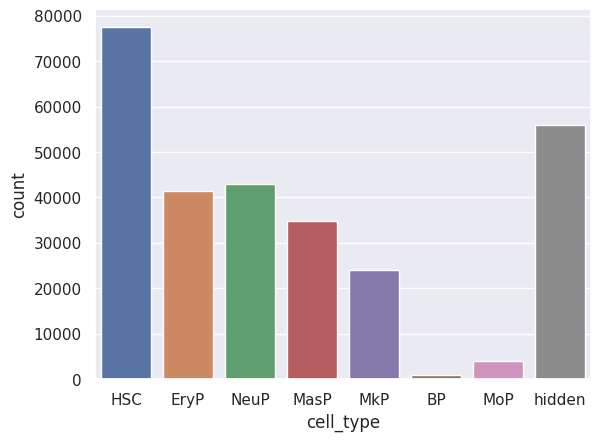

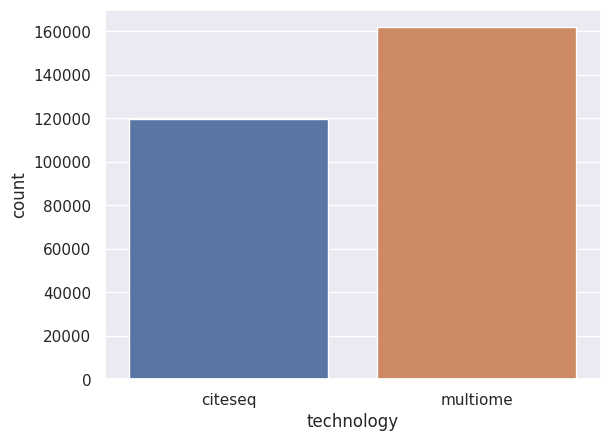

In [27]:
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt

for col in ["day", "donor", "cell_type", "technology"]:
    sns.countplot(data=metadata_df, x=col)
    plt.show()

    

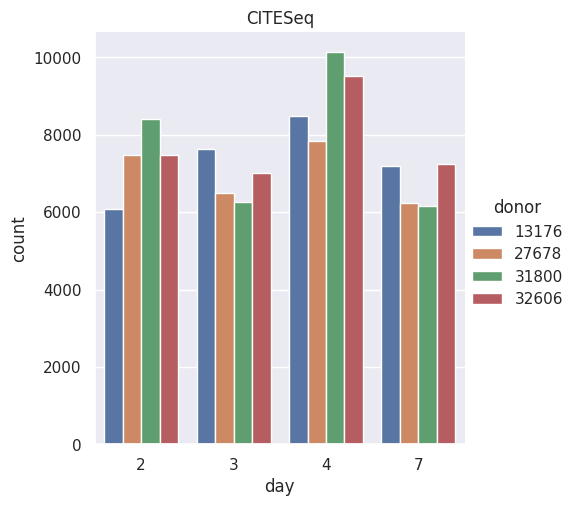

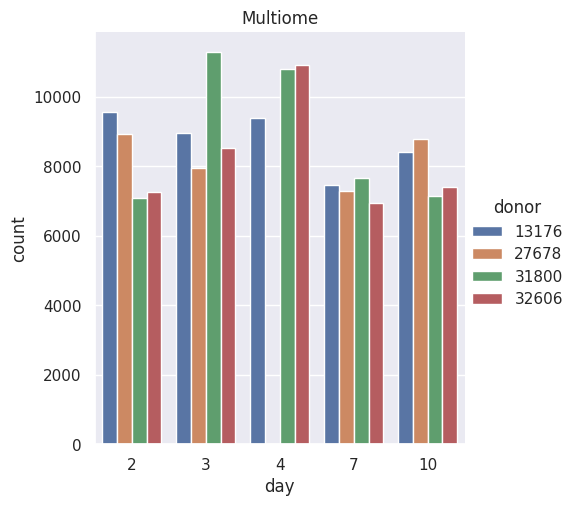

In [28]:
citeseq = sns.catplot(metadata_df[metadata_df["technology"] == "citeseq"], kind="count", x="day", hue="donor")
citeseq.set(title="CITESeq")
plt.show()

multiome = sns.catplot(metadata_df[metadata_df["technology"] == "multiome"], kind="count", x="day", hue="donor")
multiome.set(title="Multiome")
plt.show()


In [29]:
test_cites_df = pd.read_hdf(FP_CITE_TEST_INPUTS)
test_cites_df.head()

gene_id,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
cell_id,,,,,,,,,,,,,,,,,,,,,
c2150f55becb,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,4.090185,0.0
65b7edf8a4da,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,4.039545,0.0,0.0,0.00000,0.000000,0.000000,0.0
c1b26cb1057b,0.0,0.0,0.0,0.0,0.0,3.847321,0.000000,3.847321,3.847321,0.0,...,0.000000,0.000000,3.847321,4.529743,0.0,0.0,0.00000,3.847321,3.847321,0.0
917168fa6f83,0.0,0.0,0.0,0.0,0.0,0.000000,3.436846,3.436846,0.000000,0.0,...,3.436846,0.000000,4.113780,5.020215,0.0,0.0,0.00000,3.436846,4.113780,0.0
2b29feeca86d,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.196826,0.000000,0.0,...,0.000000,4.196826,4.196826,4.196826,0.0,0.0,3.51861,4.196826,3.518610,0.0


In [30]:
%%time
df_cite_train_x = pd.read_hdf(FP_CITE_TRAIN_INPUTS)
display(df_cite_train_x.head())
print("Shape:", df_cite_train_x.shape)
print("Missing Values:", df_cite_train_x.isna().sum().sum())
print("Genes which never occur train:", (df_cite_train_x ==0).all(axis=0).sum())
print(f"Zero entries in train: {(df_cite_train_x == 0).sum().sum() / df_cite_train_x.size:.0%}")
cite_gene_names = list(df_cite_train_x.columns)

gene_id,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,4.090185,0.0
d02759a80ba2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,4.039545,0.0,0.0,0.00000,0.000000,0.000000,0.0
c016c6b0efa5,0.0,0.0,0.0,0.0,0.0,3.847321,0.000000,3.847321,3.847321,0.0,...,0.000000,0.000000,3.847321,4.529743,0.0,0.0,0.00000,3.847321,3.847321,0.0
ba7f733a4f75,0.0,0.0,0.0,0.0,0.0,0.000000,3.436846,3.436846,0.000000,0.0,...,3.436846,0.000000,4.113780,5.020215,0.0,0.0,0.00000,3.436846,4.113780,0.0
fbcf2443ffb2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.196826,0.000000,0.0,...,0.000000,4.196826,4.196826,4.196826,0.0,0.0,3.51861,4.196826,3.518610,0.0


Shape: (70988, 22050)
Missing Values: 0
Genes which never occur train: 449
Zero entries in train: 78%
CPU times: user 14.9 s, sys: 3.02 s, total: 17.9 s
Wall time: 13 s


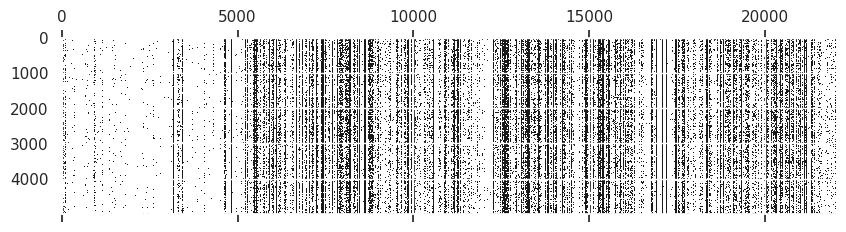

In [31]:
plt.figure(figsize=(10, 4))
plt.spy(df_cite_train_x[:5000])
plt.show()

Minimum nonzero value: 2.9715922


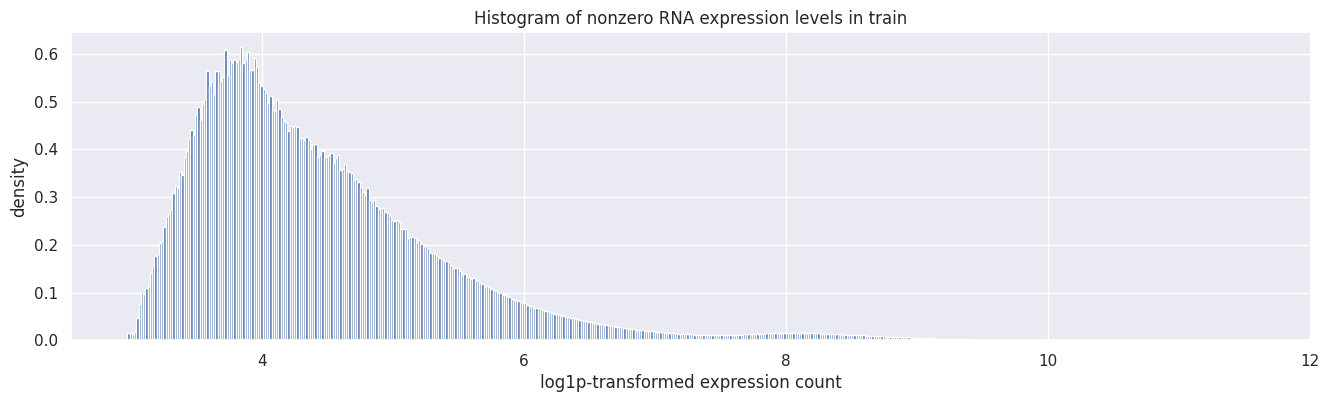

CPU times: user 8.62 s, sys: 2.9 s, total: 11.5 s
Wall time: 13 s


In [32]:
%%time
import seaborn as sns

nonzeros = df_cite_train_x.values.ravel()
nonzeros = nonzeros[nonzeros != 0]
plt.figure(figsize=(16, 4))
plt.hist(nonzeros, bins=500, density=True)
print("Minimum nonzero value:", nonzeros.min())
del nonzeros
plt.title("Histogram of nonzero RNA expression levels in train")
plt.xlabel("log1p-transformed expression count")
plt.ylabel("density")
plt.show()


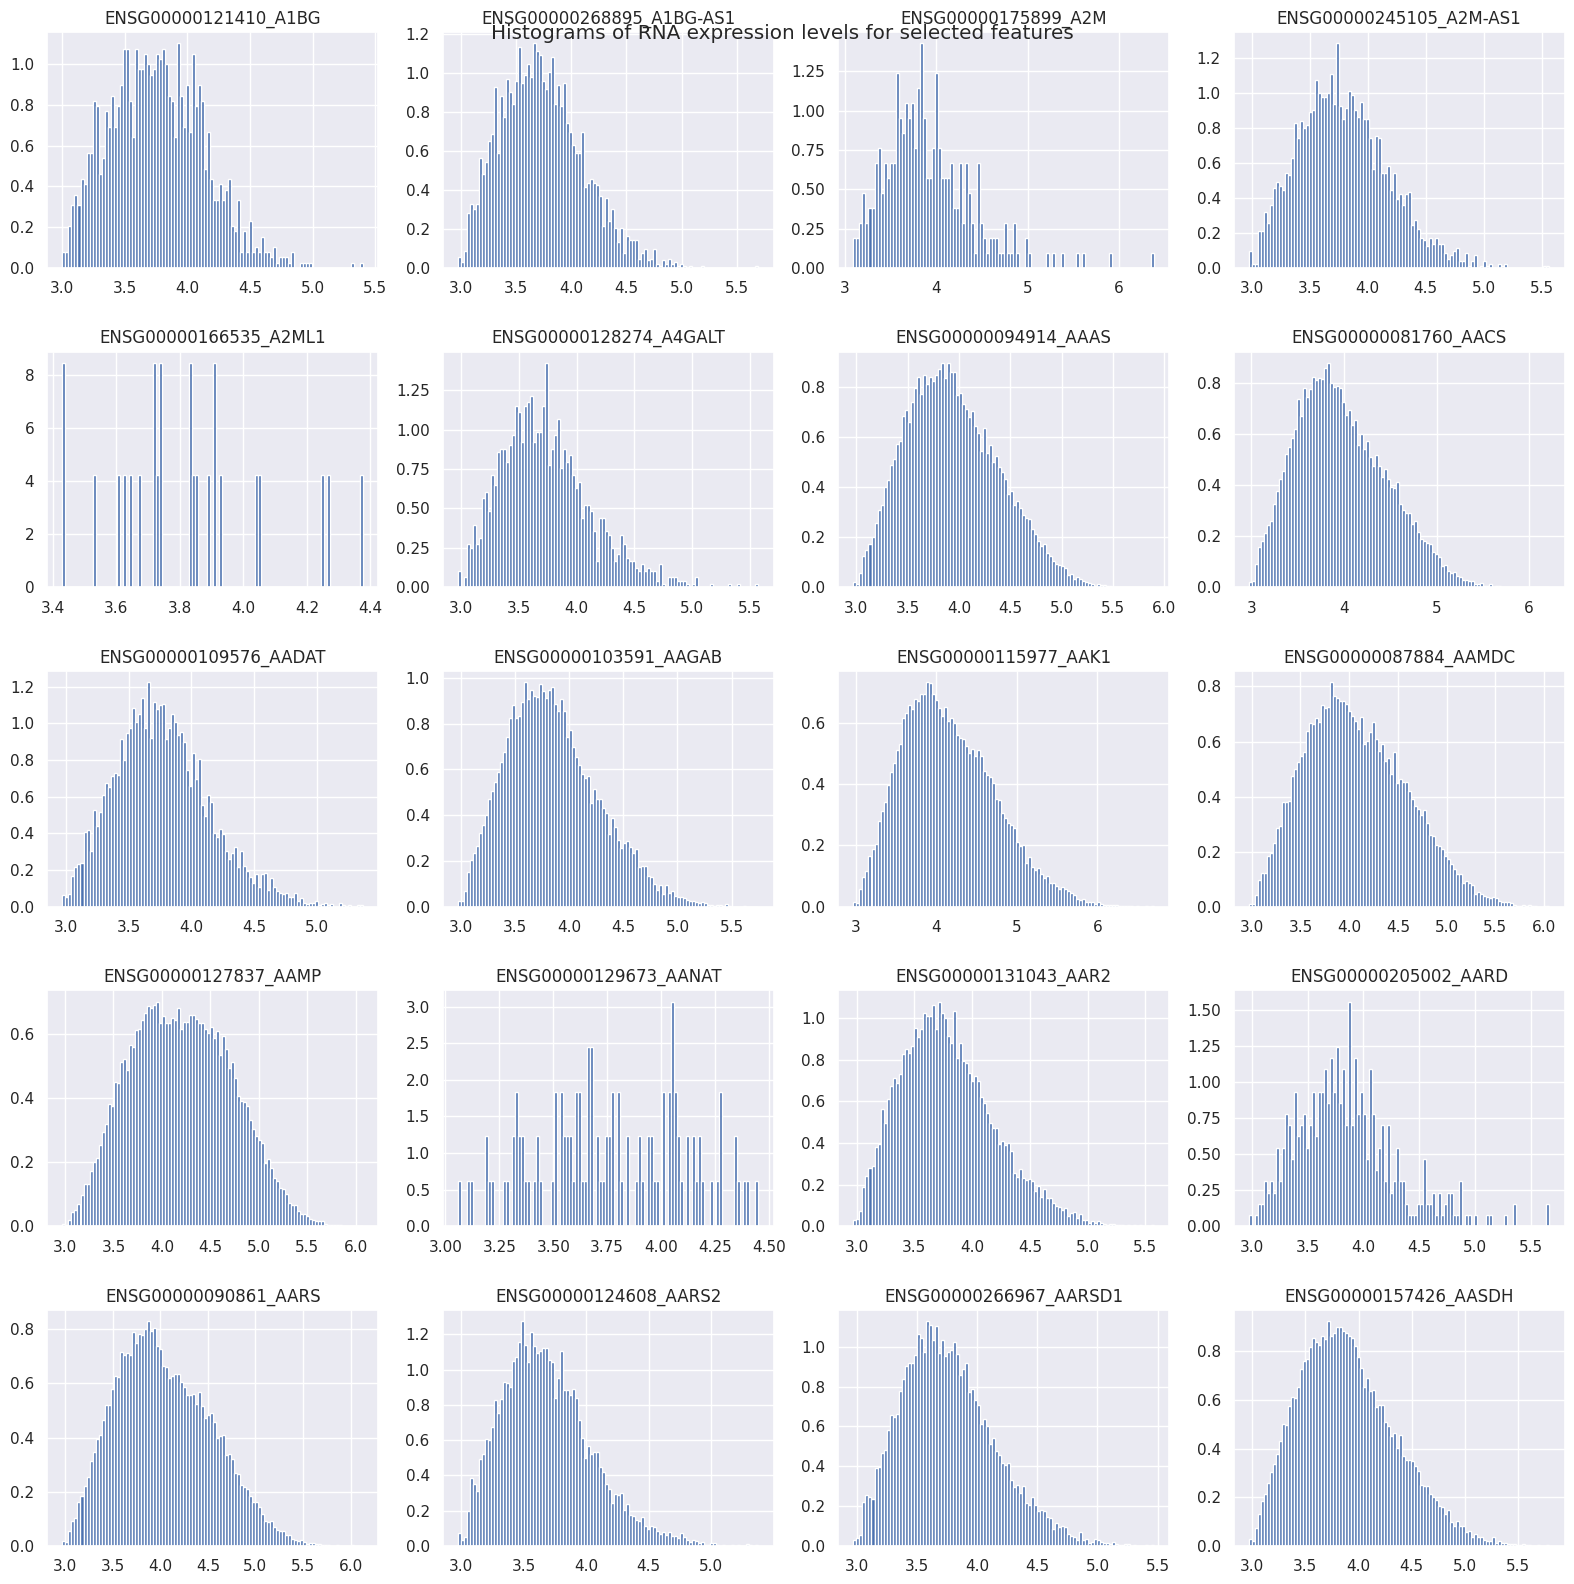

In [33]:
_, ax = plt.subplots(5, 4, figsize=(16, 16))
for col, a in zip(df_cite_train_x.columns[:20], ax.ravel()):
    nonzeros = df_cite_train_x[col].values
    nonzeros = nonzeros[nonzeros != 0]
    a.hist(nonzeros, bins=100, density=True)
    a.set_title(col)

plt.tight_layout(h_pad = 2)
plt.suptitle("Histograms of RNA expression levels for selected features")
plt.show()
del nonzeros

In [34]:
import gc
import scipy

df_meta = pd.read_csv(FP_CELL_METADATA)
df_meta_cite = df_meta[df_meta.technology=="citeseq"]

cell_index = df_cite_train_x.index
meta = df_meta_cite.reindex(cell_index)
gc.collect()
df_cite_train_x = scipy.sparse.csr_matrix(df_cite_train_x.values)

In [35]:
df_cite_test_x = pd.read_hdf(FP_CITE_TEST_INPUTS)
print("Shape of CITEseq test:", df_cite_test_x.shape)
print("Missing values:", df_cite_test_x.isna().sum())
print("Genes which never occur in test:", (df_cite_test_x == 0).all(axis=0).sum())
print(f"Zero entries in test: {(df_cite_test_x == 0).sum().sum() / df_cite_test_x.size:.0%})")

gc.collect()
cell_index_test = df_cite_test_x.index
meta_test = df_meta_cite.reindex(cell_index_test)
df_cite_test_x = scipy.sparse.csr_matrix(df_cite_test_x.values)

Shape of CITEseq test: (48663, 22050)
Missing values: gene_id
ENSG00000121410_A1BG        0
ENSG00000268895_A1BG-AS1    0
ENSG00000175899_A2M         0
ENSG00000245105_A2M-AS1     0
ENSG00000166535_A2ML1       0
                           ..
ENSG00000198455_ZXDB        0
ENSG00000070476_ZXDC        0
ENSG00000162378_ZYG11B      0
ENSG00000159840_ZYX         0
ENSG00000074755_ZZEF1       0
Length: 22050, dtype: int64
Genes which never occur in test: 745
Zero entries in test: 78%)


In [36]:
from sklearn.decomposition import TruncatedSVD
both = scipy.sparse.vstack([df_cite_train_x, df_cite_test_x])
print(f"Shape of both before SVD: {both.shape}")

svd = TruncatedSVD(n_components=2, random_state=1)
both = svd.fit_transform(both)
print(f"Shape of both after SVD: {both.shape}")

X = both[:df_cite_train_x.shape[0]]
Xt = both[df_cite_train_x.shape[0]:]

Shape of both before SVD: (119651, 22050)
Shape of both after SVD: (119651, 2)


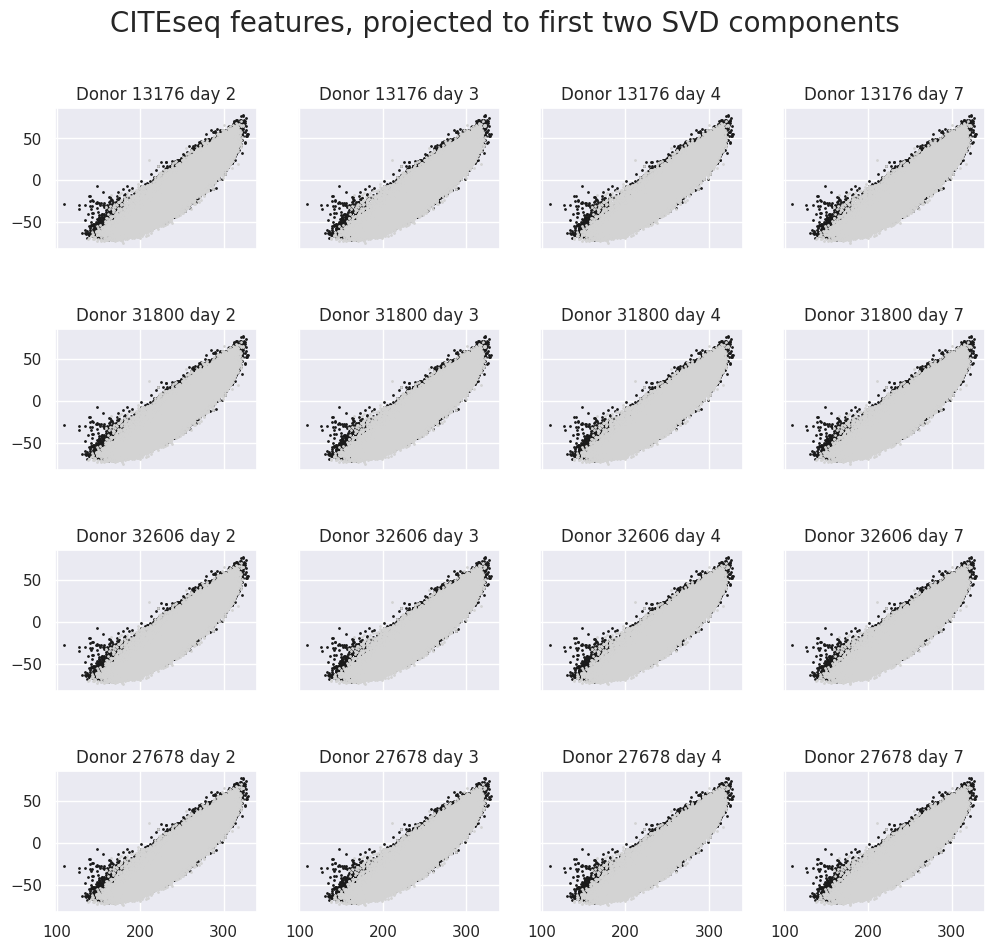

In [37]:
_, ax = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(12, 11))

for donor, axrow in zip([13176, 31800, 32606, 27678], ax):
    for day, a in zip([2, 3, 4, 7], axrow):
        a.scatter(Xt[:, 0], Xt[:, 1], s=1, c="k")
        a.scatter(X[:, 0], X[:, 1], s=1, c="lightgray")
        if day != 7 and donor != 27678:
            temp = X[(meta.donor == donor) & (meta.day == day)]
            a.scatter(temp[:,0], temp[:,1], s=1, c="orange")
        else:
            temp = Xt[(meta_test.donor == donor) & (meta_test.day == day)]
            a.scatter(temp[:,0], temp[:,1], s=1, c="darkred" if day == 7 else "orangered")
        a.set_title(f"Donor {donor} day {day}")
        a.set_aspect("equal")

plt.suptitle("CITEseq features, projected to first two SVD components", y=0.95, fontsize=20)
plt.show()



gene_id,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,...,CD94,CD162,CD85j,CD23,CD328,HLA-E,CD82,CD101,CD88,CD224
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,1.167804,0.622530,0.106959,0.324989,3.331674,6.426002,1.480766,-0.728392,-0.468851,-0.073285,...,-0.448390,3.220174,-0.533004,0.674956,-0.006187,0.682148,1.398105,0.414292,1.780314,0.548070
d02759a80ba2,0.818970,0.506009,1.078682,6.848758,3.524885,5.279456,4.930438,2.069372,0.333652,-0.468088,...,0.323613,8.407108,0.131301,0.047607,-0.243628,0.547864,1.832587,0.982308,2.736507,2.184063
c016c6b0efa5,-0.356703,-0.422261,-0.824493,1.137495,0.518924,7.221962,-0.375034,1.738071,0.142919,-0.971460,...,1.348692,4.888579,-0.279483,-0.131097,-0.177604,-0.689188,9.013709,-1.182975,3.958148,2.868600
ba7f733a4f75,-1.201507,0.149115,2.022468,6.021595,7.258670,2.792436,21.708519,-0.137913,1.649969,-0.754680,...,1.504426,12.391979,0.511394,0.587863,-0.752638,1.714851,3.893782,1.799661,1.537249,4.407671
fbcf2443ffb2,-0.100404,0.697461,0.625836,-0.298404,1.369898,3.254521,-1.659380,0.643531,0.902710,1.291877,...,0.777023,6.496499,0.279898,-0.841950,-0.869419,0.675092,5.259685,-0.835379,9.631781,1.765445


Output shape: (70988, 140)


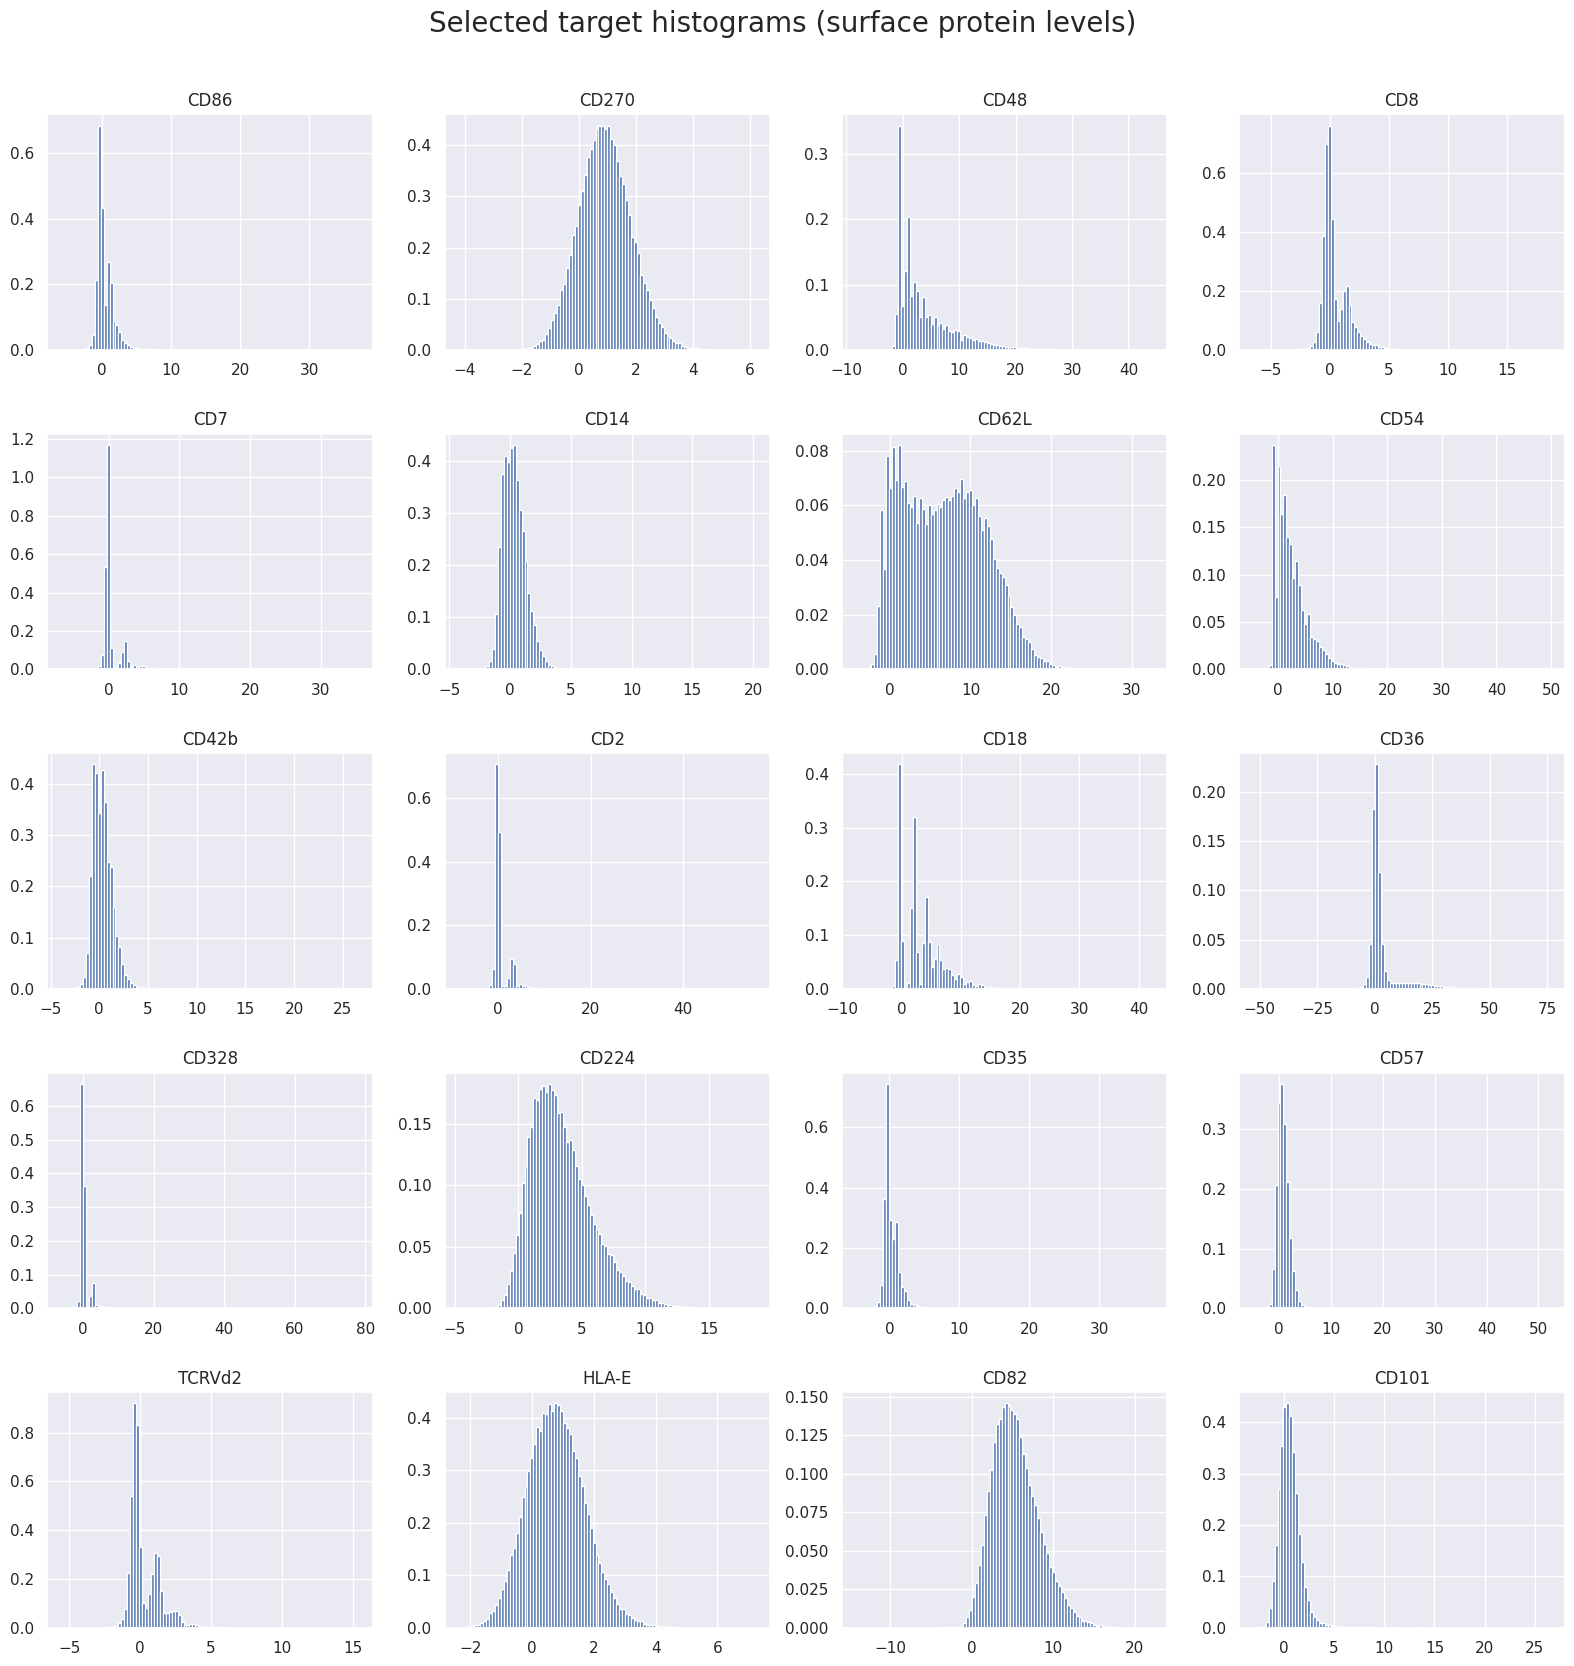

In [38]:
df_cite_train_y = pd.read_hdf(FP_CITE_TRAIN_TARGETS)
display(df_cite_train_y.head())
print("Output shape:", df_cite_train_y.shape)

_, axs = plt.subplots(5, 4, figsize=(16, 16))
for col, ax in zip(['CD86', 'CD270', 'CD48', 'CD8', 'CD7', 'CD14', 'CD62L', 'CD54', 'CD42b', 'CD2', 'CD18', 'CD36', 'CD328', 'CD224', 'CD35', 'CD57', 'TCRVd2', 'HLA-E', 'CD82', 'CD101'], axs.ravel()):
    ax.hist(df_cite_train_y[col], bins=100, density=True)
    ax.set_title(col)

plt.tight_layout(h_pad=2)
plt.suptitle("Selected target histograms (surface protein levels)", fontsize=20, y=1.04)
plt.show()

cite_protein_names = list(df_cite_train_y.columns)

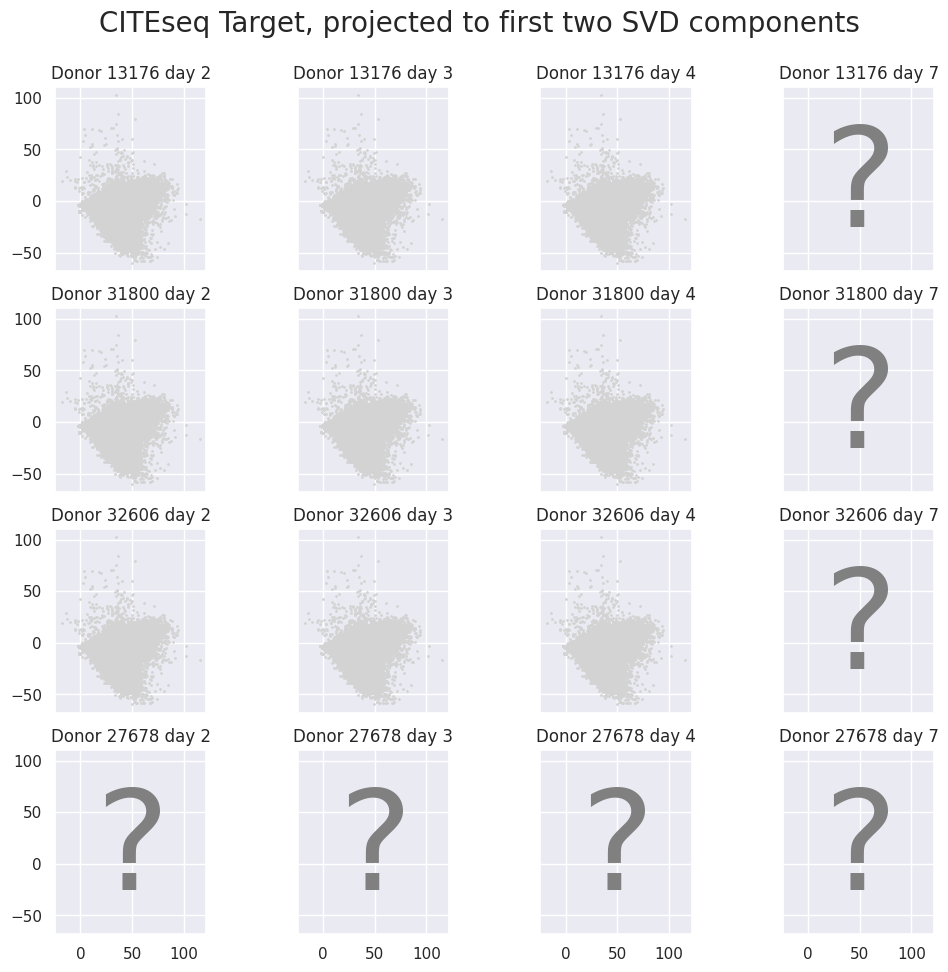

In [39]:
svd = TruncatedSVD(n_components=2, random_state=1)
X = svd.fit_transform(df_cite_train_y)

_, axs = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(12, 11))
for donor, axrow in zip([13176, 31800, 32606, 27678], axs):
    for day, ax in zip([2, 3, 4, 7], axrow):
        if day != 7 and donor != 27678:
            ax.scatter(X[:, 0], X[:,1], s=1, c="lightgray")
            temp = X[(meta.donor == donor) & (meta.day == day)]
            ax.scatter(temp[:, 0], temp[:1,], s=1, c="orange")
        else:
            ax.text(50, -25, "?", fontsize=100, color="gray", ha="center")
        ax.set_title(f"Donor {donor} day {day}")
        ax.set_aspect("equal")

plt.suptitle("CITEseq Target, projected to first two SVD components", y=0.95, fontsize=20)
plt.show()

        

In [40]:
df_cite_train_x, df_cite_train_y, X, svd = None, None, None, None

In [41]:
matching_names = []
for protein in cite_protein_names:
    matching_names += [(gene, protein) for gene in cite_gene_names if protein in gene]
pd.DataFrame(matching_names, columns=["Gene", "Protein"])

,Gene,Protein
0,ENSG00000114013_CD86,CD86
1,ENSG00000120217_CD274,CD274
2,ENSG00000196776_CD47,CD47
3,ENSG00000117091_CD48,CD48
4,ENSG00000101017_CD40,CD40
...,...,...
146,ENSG00000102181_CD99L2,CD9
147,ENSG00000223773_CD99P1,CD9
148,ENSG00000204592_HLA-E,HLA-E
149,ENSG00000085117_CD82,CD82


cite_gene_names

In [43]:
%%time
import numpy as np

df_meta_multi = df_meta[df_meta.technology=="multiome"]

bins = 100
cell_summary = pd.DataFrame()

def analyze_multiome_x(filename):
    global cell_summary
    start = 0
    chunksize = 5000
    total_rows = 0
    maximum_x = 0

    while True:
        X = pd.read_hdf(filename, start=start, stop=start+chunksize)
        if X.isna().any().any():
            print("There are missing values")
        if (X < 0).any().any():
            print("There are negative values")
        total_rows += len(X)
        print(total_rows, "rows read")

        donors = df_meta_multi.donor.reindex(X.index)
        days = df_meta_multi.day.reindex(X.index)

        chrY_cols = [f for f in X.columns if "chrY" in f]
        maximum_x = max(maximum_x, X[chrY_cols].values.ravel().max())
        for donor in [13176, 31800, 32606, 27678]:
            hist, _ = np.histogram(X[chrY_cols][donors == donor].values.ravel(), bins=bins, range=(0, 15))
            chrY_histo[donor] += hist

        cell_summary = pd.concat([cell_summary, pd.DataFrame({
            "donor": donors,
            "day": days,
            "total": X.sum(axis=1),
            "total_nonzero": (X != 0).sum(axis=1)
        })])
        
        if len(X) < chunksize:
            break
            
        start += chunksize
    
    display(X.head(3))
    print(f"Zero entries in {filename}: {(X==0).sum().sum() / X.size:.0%}")

chrY_histo = dict()
for donor in [13176, 31800, 32606, 27678]:
    chrY_histo[donor] = np.zeros((bins,), int)

analyze_multiome_x(FP_MULTIOME_TRAIN_INPUTS)


5000 rows read


: 

: 

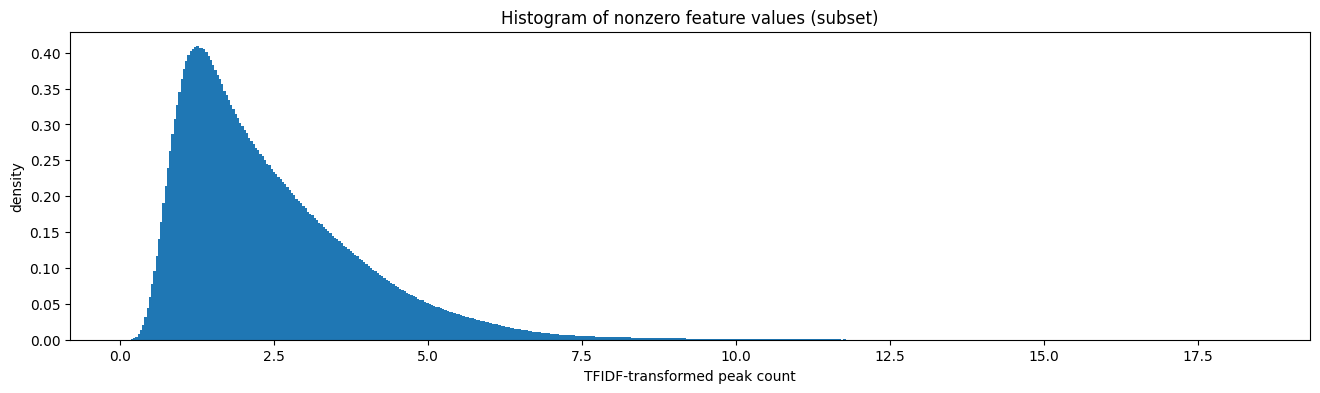

In [ ]:
df_multi_train_x = pd.read_hdf(FP_MULTIOME_TRAIN_INPUTS, start=0, stop=5000)
nonzeros = df_multi_train_x.values.ravel()
nonzeros = nonzeros[nonzeros != 0]
plt.figure(figsize=(16, 4))
plt.hist(nonzeros, bins=500, density=True)
del nonzeros
plt.title("Histogram of nonzero feature values (subset)")
plt.xlabel("TFIDF-transformed peak count")
plt.ylabel("density")
plt.show()
del df_multi_train_x

In [ ]:
analyze_multiome_x(FP_MULTIOME_TEST_INPUTS)

In [ ]:
def plot_batch_effects():
    _, axs = plt.subplots(1, 2, sharey=True, figsize=(12, 10))
    color = cell_summary.day.map({2: "r", 3: "g", 4: "b", 7: "y", 10: "gray"})
    axs[0].scatter(cell_summary.total_nonzero, np.arange(len(cell_summary)), s=0.1, c=color)
    axs[0].set_xlabel("cell total")
    axs[1].scatter(cell_summary.total, np.arange(len(cell_summary)), s=0.1, c=color)
    axs[1].set_xlabel("cell total nonzeros")
    axs[0].set_ylabel("cell")
    axs[0].invert_yaxis()
    plt.suptitle("Row totals colored by day", y=0.94, fontsize=20)
    plt.show()

plot_batch_effects()

In [ ]:
_, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(14, 4))
for donor, ax in zip([13176, 31800, 32606, 27678], axs):
    ax.set_title(f"Donor {donor} {'test' if donor == 27678 else ''}", fontsize=16)
    total = chrY_histo[donor].sum()
    ax.fill_between(range(bins-1), chrY_histo[donor][1:] / total, color="limegreen")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.suptitle("Histogram of nonzero Y chromosome accessibility", y=0.95, fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
%%time

cell_summary = pd.DataFrame()
start = 0
chunksize = 10000
total_rows = 0

while True:
    df_multi_train_y = pd.read_hdf(FP_MULTIOME_TRAIN_TARGETS, start=start, stop=start+chunksize)
    if df_multi_train_y.isna().any().any():
        print("There are some missing values")
    if (df_multi_train_y < 0).any().any():
        print("There are negative values")

    total_rows += len(df_multi_train_y)
    print(total_rows, "rows read")

    donors = df_meta_multi.donor.reindex(df_multi_train_y.index)
    days = df_meta_multi.day.reindex(df_multi_train_y.index)
    cell_summary = pd.concat([cell_summary, 
        pd.DataFrame({"donors": donors, "days": days, "total": df_multi_train_y.sum(axis=1), "total_nonzero": (df_multi_train_y != 0).sum(axis=1)})
    ])

    if len(df_multi_train_y) < chunksize:
        break

    start += chunksize